In [3]:
# Importing necessary libraries
import pandas as pd
import pyarrow as pr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In this code snippet:

    from sklearn.datasets import load_iris: This line imports the load_iris() function from the datasets module of Scikit Learn, which allows us to load the Iris dataset.
    iris_data = load_iris(): This line loads the Iris dataset and stores it in the variable iris_data.
    print("Features:", iris_data.feature_names): This line prints the names of the features (attributes) of the Iris dataset.
    print("Target classes:", iris_data.target_names): This line prints the names of the target classes (species of iris) in the dataset.
    print("Number of samples:", len(iris_data.data)): This line prints the total number of samples (instances) in the dataset.
    print("Number of features:", len(iris_data.feature_names)): This line prints the total number of features (attributes) in the dataset.

After executing this code cell in your Jupyter Notebook, you'll have loaded the Iris dataset, and you'll have basic information about it displayed. This information will help you understand the structure and contents of the dataset, which is essential for further analysis and modeling.

In [4]:
# Importing necessary libraries
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()

# Displaying basic information about the dataset
print("Features:", iris_data.feature_names)
print("Target classes:", iris_data.target_names)
print("Number of samples:", len(iris_data.data))
print("Number of features:", len(iris_data.feature_names))


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4


In [5]:
# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Display the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
# Display statistical summary of the dataset
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


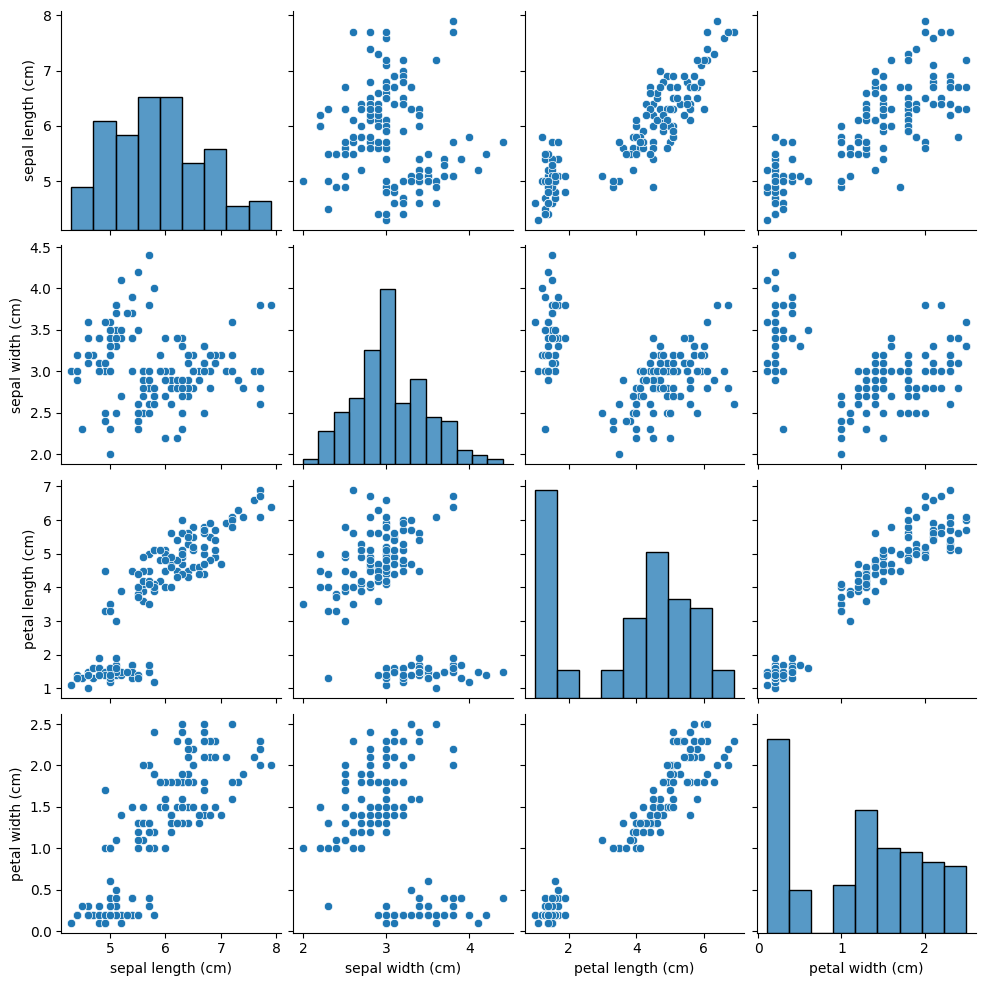

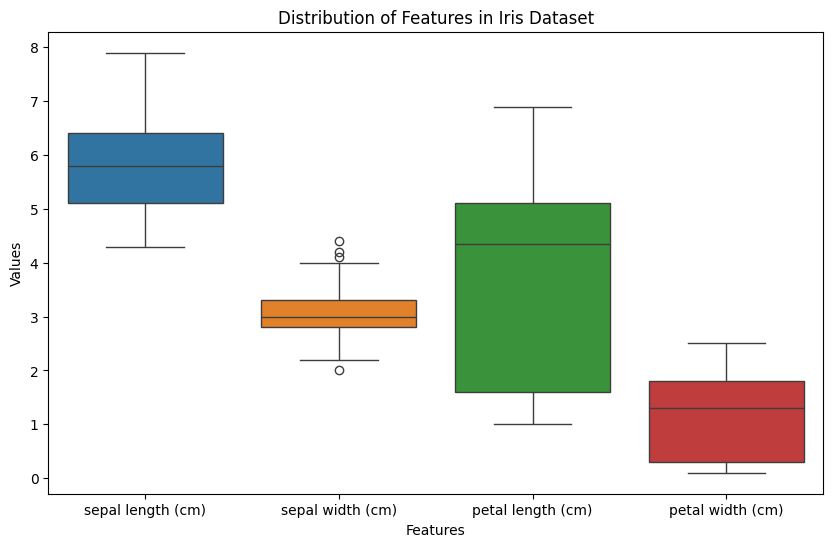

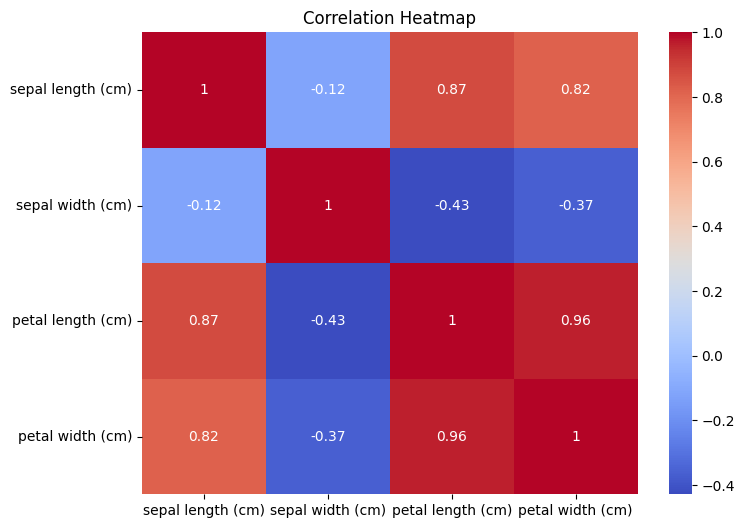

In [7]:
# Pairplot to visualize pairwise relationships between features
sns.pairplot(iris_df)
plt.show()

# Boxplot to visualize the distribution of each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Distribution of Features in Iris Dataset')
plt.show()

# Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

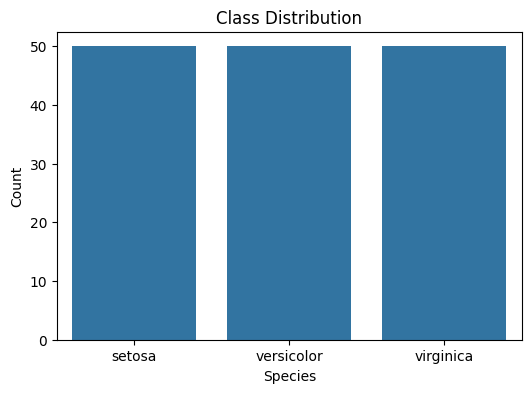

In [8]:
# Convert target labels to class names
iris_target_names = [iris_data.target_names[i] for i in iris_data.target]

# Countplot to visualize the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x=iris_target_names)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [9]:
# Check for missing values
missing_values = iris_df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)



In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target labels (y)
X = iris_data.data
y = iris_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_df, y, test_size=0.2, random_state=42)


In [12]:
# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)


Best Hyperparameters: {'C': 1}
Best Model Accuracy: 1.0


lets use knn nearest neighbor 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN classifier with k=3 (you can adjust k as needed)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)


KNN Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
